# Exercício 5 de Análise de Componentes Independentes
Pedro Bandeira de Mello Martins

CPE 782 - Análise de Componentes Independentes



Análise feita para 100 amostras

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from scipy.cluster.vq import whiten
import pandas as pd
from pandas.plotting import scatter_matrix
from scipy.stats import entropy, chi2_contingency, shapiro

%matplotlib inline
from evaluation import calculateNegentropy, kde_entropy, KLdivergence, resultsTable, plot_MutualInformation
from ICAfunctions import cichocki_Feedback, cichocki_Feedforward, NPCA_RLS

#Notes:
#SHAPIRO: The algorithm used is described in [R634] but censoring parameters as 
#        described are not implemented. For N > 5000 the W test statistic is 
#        accurate but the p-value may not be.

In [2]:
learning_rate = 1e-6
gaussian_distribution = np.random.normal(0,1,1000)
shapiro(np.random.uniform(-1,1,1000))

(0.9578285217285156, 2.243452258191128e-16)

In [3]:
filePath = 'https://raw.githubusercontent.com/micaelverissimo/ICA/master/FifthMixture100Stats.txt'
distDataFrame = pd.read_table(filePath, delimiter = '\s+', header = None)
mixtures = distDataFrame.values
print(distDataFrame.T.head())

          0         1         2          3
0 -0.216549  3.273472  6.285520   7.419985
1  1.166360  3.867211 -0.780863   5.864078
2 -0.053111  1.220557  1.761053   2.941826
3  0.793482  4.107869  2.492031   6.048237
4 -2.468365  4.905068  7.044965  11.911218


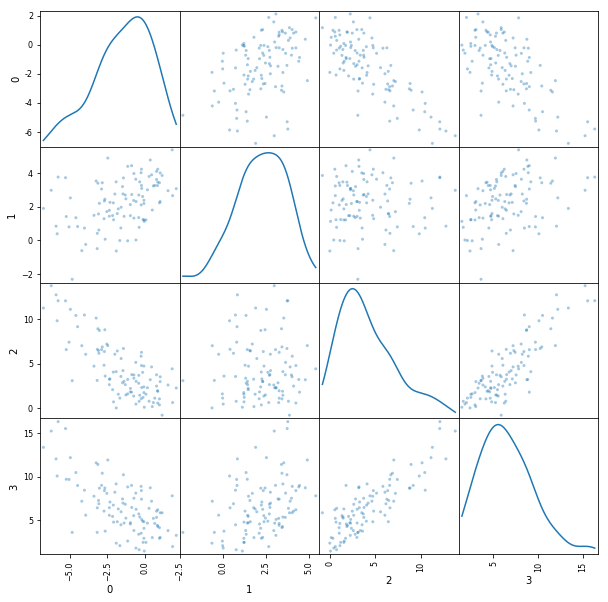

In [4]:
scatter_matrix(distDataFrame.T, alpha=0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

In [5]:
resultsTable(mixtures)

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.2013,0.9643,0.0081817
1,0.1181,0.1407,0.9859,0.36733
2,0.108,0.3891,0.922,1.8085e-05
3,0.0153,0.6495,0.9546,0.0016973


## NPCA-RLS Algorithm

In [6]:
[yNPCA, WNPCA] = NPCA_RLS(mixtures, runs = 1)

Execution time: 0.023000717163085938 seconds


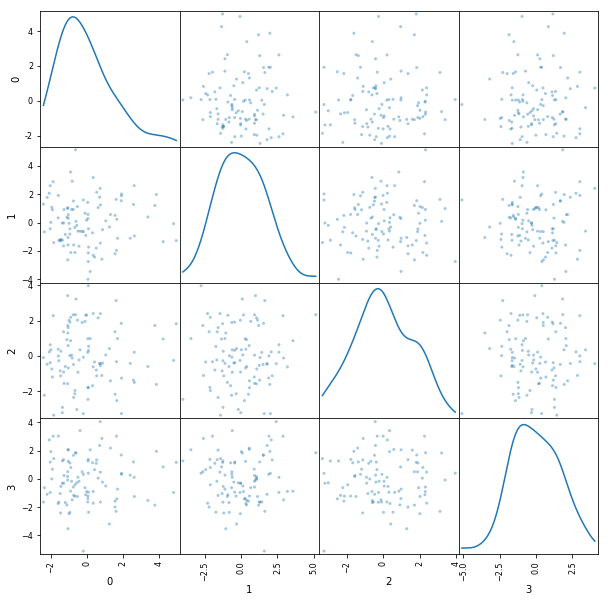

In [7]:
scatter_matrix(pd.DataFrame(yNPCA.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.1194,0.5105,0.9251,2.6483e-05
1,0.029,0.0355,0.9937,0.92653
2,0,0.0896,0.9845,0.29337
3,0.1019,0.1691,0.9893,0.60628


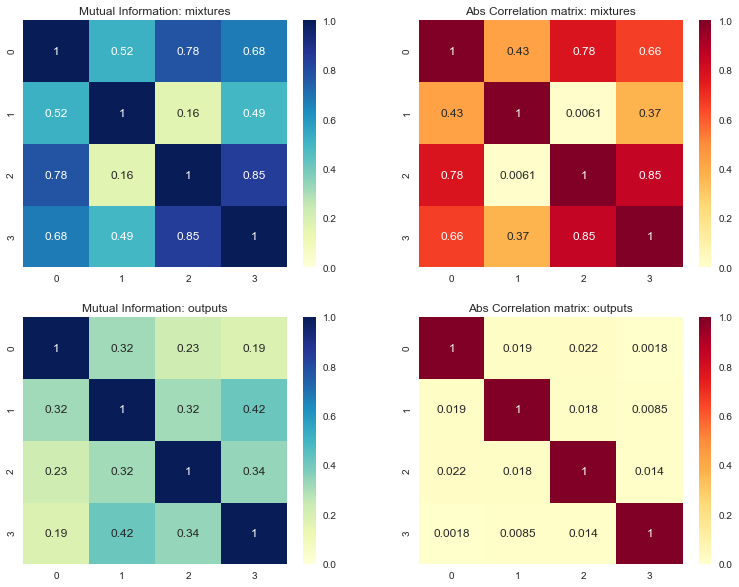

In [8]:
resultsTable(yNPCA)
plot_MutualInformation(mixtures, y = yNPCA, KDE = True)

## Chichocki-Unbehauen Algorithm Feedback network

In [9]:
[yFeedback, WFeedback] = cichocki_Feedback(mixtures, learningRate = 1e-1,runs  = 1) 

Execution time: 0.014000415802001953 seconds


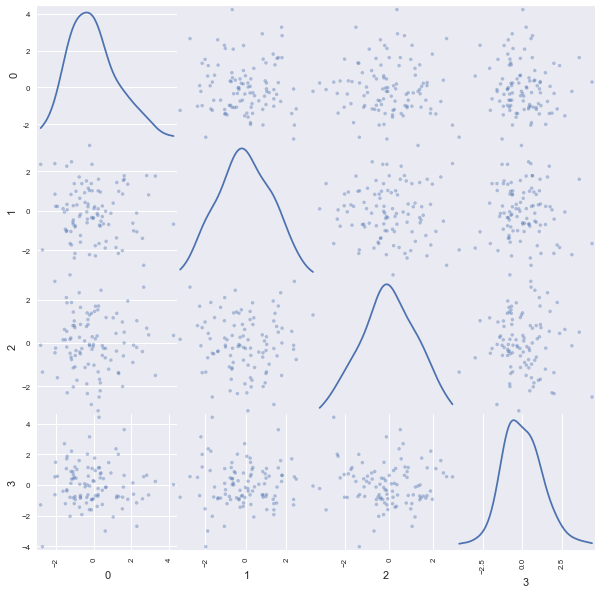

In [10]:
scatter_matrix(pd.DataFrame(yFeedback.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0.0538,0.0747,0.9693,0.019586
1,0,0.0877,0.9924,0.852
2,0,0.0902,0.9936,0.92297
3,0.1953,0.2042,0.9793,0.11666


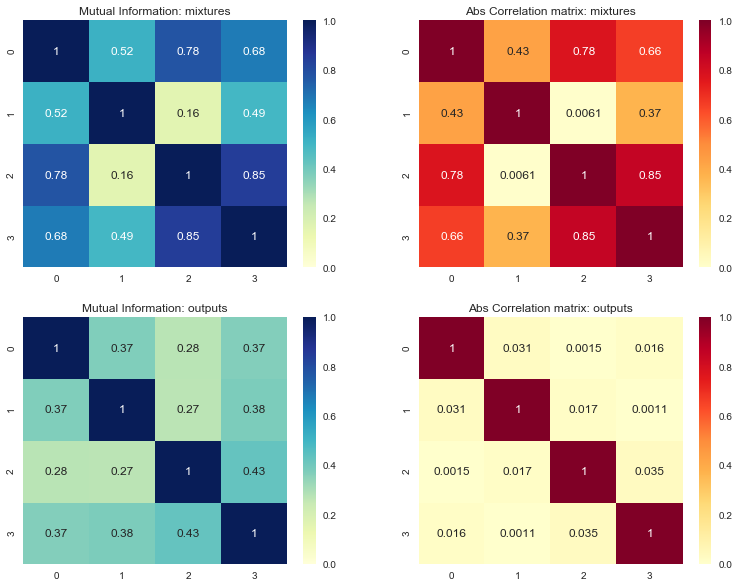

In [11]:
resultsTable(yFeedback)
plot_MutualInformation(mixtures, y = yFeedback, KDE = True)

## Chichocki-Unbehauen Algorithm Feedforward network

In [12]:
[yFeedforward, WFeedforward] = cichocki_Feedforward(mixtures, learningRate = 1e-3, runs = 1)

Execution time: 0.012999534606933594 seconds


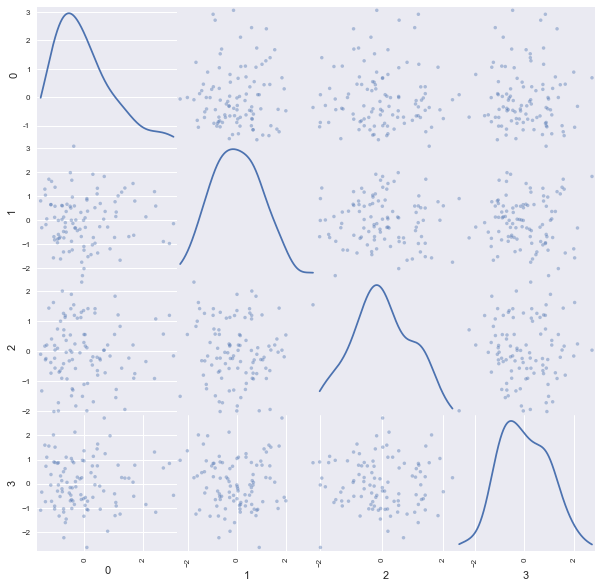

In [13]:
scatter_matrix(pd.DataFrame(yFeedforward.T), alpha = 0.4, diagonal = 'kde', figsize = (10,10))
plt.show()

Data,Negentropy,KL Divergence,Shapiro-Wilk test W,Shapiro-Wilk test P_value
0,0,0.3598,0.9226,1.9294e-05
1,0.0493,0.0127,0.9923,0.84228
2,0,0.2693,0.9826,0.21214
3,0.0581,0.1103,0.9901,0.67114


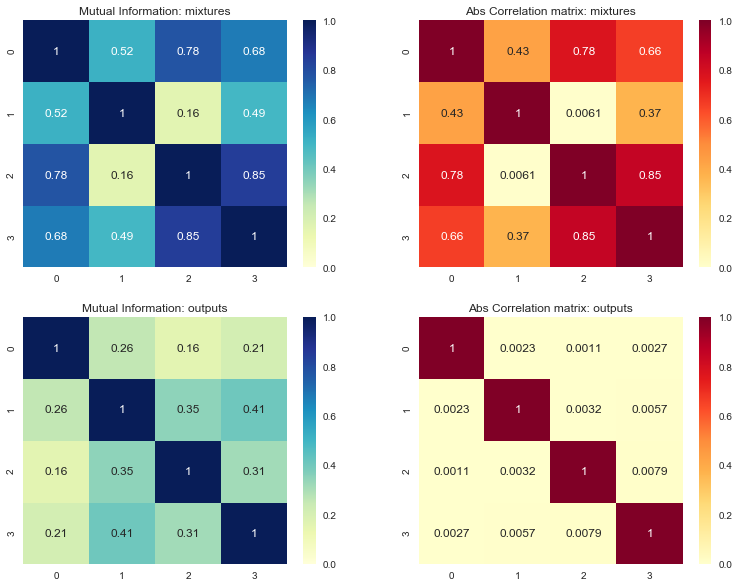

In [14]:
resultsTable(yFeedforward)
plot_MutualInformation(mixtures, y = yFeedforward, KDE = True)